In [1]:
%load_ext autoreload
%autoreload 2

%load_ext autotime

%cd ..

/Users/rubenbroekx/Documents/Projects/edbscan
time: 1.78 ms (started: 2021-12-13 13:55:26 +01:00)


# Usage

This notebook shows the basic usage of the EDBSCAN algorithm.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from edbscan import EDBSCAN, edbscan, analyse_edbscan

time: 841 ms (started: 2021-12-13 13:55:27 +01:00)


In [3]:
# Specify the color scheme
COLORS = {
    None: 'tab:blue',
    -1: 'tab:blue',
    0: 'tab:orange',
    1: 'tab:green',
    2: 'tab:red',
    3: 'tab:purple',
    4: 'tab:brown',
    5: 'tab:pink',
    6: 'tab:gray',
    7: 'tab:olive',
    8: 'tab:cyan',
}

time: 713 µs (started: 2021-12-13 13:55:28 +01:00)


In [4]:
# Load in the data
with open(Path.cwd() / 'examples/data/default_X.npy', 'rb') as f:
    data = np.load(f,allow_pickle=True)
    
with open(Path.cwd() / 'examples/data/default_y.npy', 'rb') as f:
    y = np.load(f,allow_pickle=True)

# Show the manually labeled samples
y

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, -1, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, -1, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, 0, None, None, None, None, None, None, None,
       None, None, None, None, None, 1, None, None, None, None, 2, None,
       None, None, None, None, None, None, None, None, 3, None, None,
       None, None, None, None, None, None, None, None, None, 

time: 6.08 ms (started: 2021-12-13 13:55:28 +01:00)


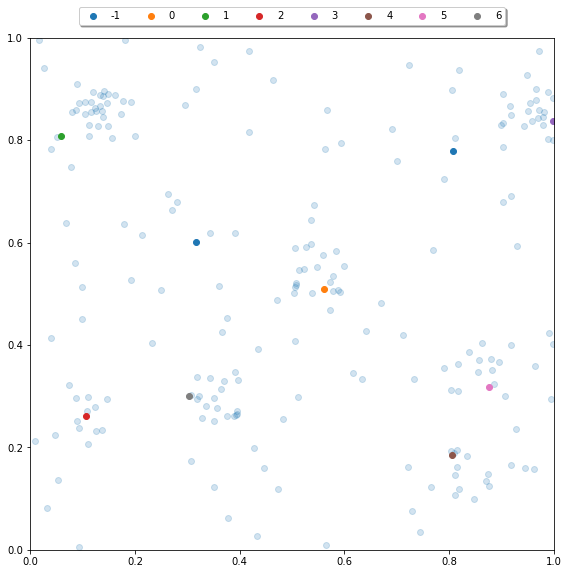

time: 259 ms (started: 2021-12-13 13:55:33 +01:00)


In [5]:
# Visualise the raw data (including the manually put labels)
plt.figure(figsize=(8,8))
for label in [None,] + list(range(-1,7)):
    plt.scatter(
        data[y == label,0],
        data[y == label,1],
        label=label,
        alpha=.2 if label == None else 1,
        color=COLORS[label],
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=8, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [6]:
# EDBSCAN
_, labels = edbscan(eps=.1, min_samples=5, X=data, y=y)
labels

array([-1,  2,  2,  4, -1, -1,  6,  3,  4,  3,  6, -1, -1,  4, -1,  0,  1,
       -1, -1, -1,  0,  0,  5,  4,  2,  5,  4, -1,  2, -1,  6,  3, -1, -1,
       -1,  5,  0,  5,  1,  2, -1,  5, -1,  6,  0, -1,  3, -1, -1, -1,  5,
        0, -1,  4,  0, -1,  6, -1,  5, -1, -1, -1,  1, -1, -1,  2,  4, -1,
       -1,  6,  3, -1,  3,  3, -1,  6,  6, -1, -1, -1, -1, -1,  4,  1, -1,
        0, -1,  4, -1,  0,  4,  3,  0,  6,  6,  5,  5,  2,  5,  5,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6])

time: 6.51 ms (started: 2021-12-13 13:55:33 +01:00)


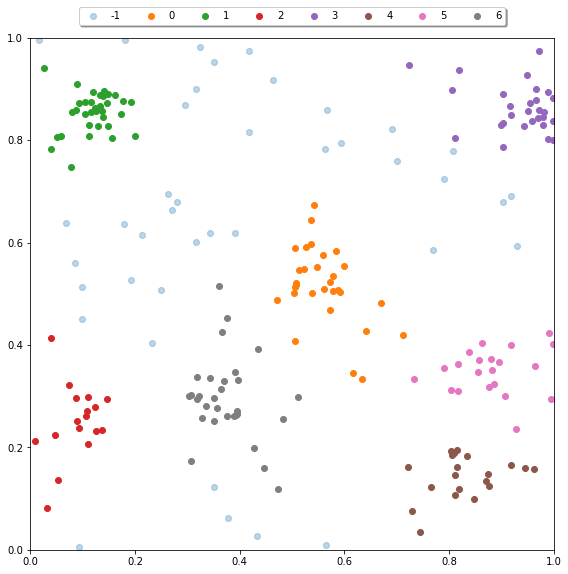

time: 220 ms (started: 2021-12-13 13:55:34 +01:00)


In [7]:
# Visualise the result
plt.figure(figsize=(8,8))
for cluster in sorted(set(labels)):
    plt.scatter(
        data[labels == cluster,0], 
        data[labels == cluster,1], 
        label=cluster,
        alpha=0.3 if cluster == -1 else 1,
        color=COLORS[cluster],
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=len(set(labels)), fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [8]:
# You can analyse the final result by running: analyse_edbscan
result = analyse_edbscan(
    X=data,
    y=y,
    eps=.1,
    min_samples=5,
)

time: 6.05 ms (started: 2021-12-13 13:55:35 +01:00)


In [9]:
# Print out the analysed result
for k,v in result.items():
    if k == 'number_of_clusters':
        print(f"{k}:")
        for kk,vv in v.items():
            print(f" - {kk}: {len(vv)} ({sorted(vv)})")
    elif k == 'cluster_nn':
        print(f"{k}:")
        for kk,vv in sorted(v.items()):
            print(f" - {kk}: min={vv[0]}, avg={vv[1]:.2f}, max={vv[2]}")
    elif k == 'cluster_dist':
        print(f"{k}:")
        for kk,vv in sorted(v.items()):
            print(f" - {kk}: min={vv[0]:.5f}, avg={vv[1]:.5f}, max={vv[2]:.5f}")
    else:
        print(f"{k}: {v}")

noise_ratio: 0.18181818181818182
core_point_ratio: 0.759090909090909
number_of_clusters:
 - provided: 7 ([0, 1, 2, 3, 4, 5, 6])
 - found: 7 ([0, 1, 2, 3, 4, 5, 6])
 - added: 0 ([])
cluster_nn:
 - 0: min=2, avg=15.37, max=22
 - 1: min=3, avg=25.62, max=32
 - 2: min=2, avg=9.65, max=13
 - 3: min=2, avg=17.36, max=22
 - 4: min=3, avg=11.65, max=15
 - 5: min=3, avg=10.90, max=16
 - 6: min=1, avg=14.23, max=21
cluster_dist:
 - 0: min=0.00422, avg=0.11355, max=0.35113
 - 1: min=0.00580, avg=0.06927, max=0.21877
 - 2: min=0.00990, avg=0.09889, max=0.33339
 - 3: min=0.00540, avg=0.09721, max=0.31256
 - 4: min=0.00639, avg=0.09594, max=0.24987
 - 5: min=0.01176, avg=0.10397, max=0.27512
 - 6: min=0.00334, avg=0.11790, max=0.41230
time: 1.72 ms (started: 2021-12-13 13:55:35 +01:00)


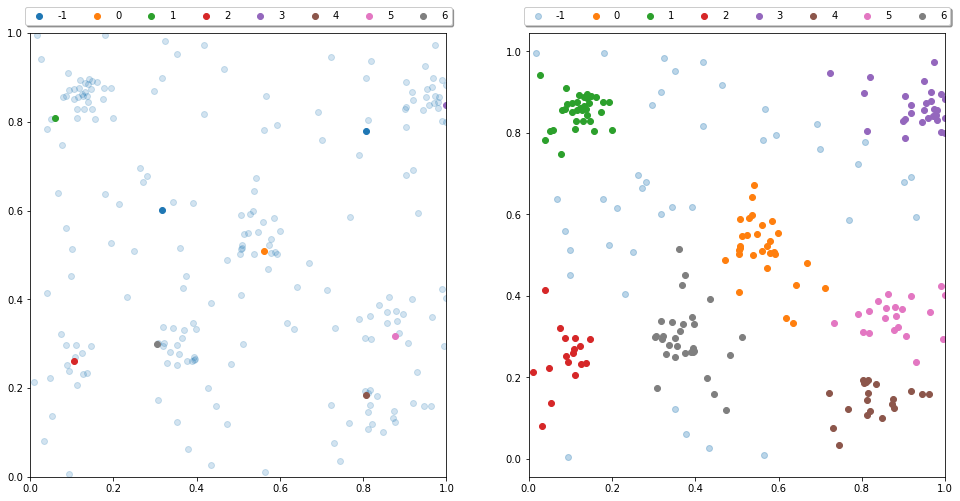

time: 956 ms (started: 2021-12-13 14:14:33 +01:00)


In [19]:
# Show the input
fig, ax = plt.subplots(1,2, figsize=(14,7))

for label in [None,] + list(range(-1,7)):
    ax[0].scatter(
        data[y == label,0],
        data[y == label,1],
        label=label,
        alpha=.2 if label == None else 1,
        color=COLORS[label],
    )
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=8, fancybox=True, shadow=True)

for cluster in sorted(set(labels)):
    ax[1].scatter(
        data[labels == cluster,0], 
        data[labels == cluster,1], 
        label=cluster,
        alpha=0.3 if cluster == -1 else 1,
        color=COLORS[cluster],
    )
ax[1].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=len(set(labels)), fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig(f'examples/images/usage.png', dpi=200, facecolor='white', transparent=False)
plt.show()